In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
Train=pd.read_csv('train.csv')
Test=pd.read_csv('test.csv')

In [3]:
Data=pd.concat([Train,Test],sort=False)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data['Survived'].isnull().sum()

418

In [5]:
Data['Survived']=Data['Survived'].dropna()
Data['Survived'].isnull().sum()

0

In [6]:
Data['Has_Cabin']=np.where(Data['Cabin'].isnull(),0,1)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
import re
def find_Title(x):
    pattern='[,][\s\w]*[\.]'
    List=re.findall(pattern,x)
    return List[0][2:-1]
Data['Tit']=Data['Name'].apply(find_Title)
def Get_Title(x):
    if x=='Mr':
        return 'Mr'
    elif x=='Mrs':
        return 'Mrs'
    elif x=='Miss':
        return 'Miss'
    elif x=="Master":
        return 'Master'
    else:
        return 'Special'
Data['Title']=Data['Tit'].apply(Get_Title)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Tit,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr


In [8]:
Data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Has_Cabin         0
Tit               0
Title             0
dtype: int64

Imputing fare by class of passenger

In [9]:
Data['Fare']=Data['Fare'].fillna(Data['Fare'][Data['Pclass']==3].median())
Data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Has_Cabin         0
Tit               0
Title             0
dtype: int64

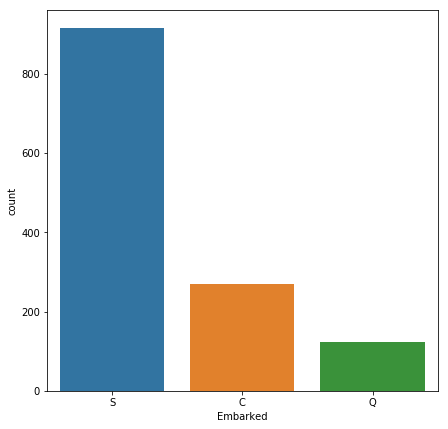

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(data=Data,x='Embarked')
plt.show()

We See that the Most people have Embarked From the Port S.<br>
Hence, It is Safe to Assume that the People from missing ports have Embarked from the Port S.


In [11]:
Data['Embarked']=Data['Embarked'].fillna('S')
Data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

We Will Now impute the missing values with the median of the people of same Title.

In [12]:
med_mr=Data['Age'][Data['Title']=='Mr'].median()
Data['Age'][Data['Title']=='Mr']=Data[Data['Title']=='Mr']['Age'].fillna(med_mr)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              87
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

In [13]:
med_mrs=Data['Age'][Data['Title']=='Mrs'].median()
Data['Age'][Data['Title']=='Mrs']=Data[Data['Title']=='Mrs']['Age'].fillna(med_mrs)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              60
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

In [14]:
med_mi=Data['Age'][Data['Title']=='Miss'].median()
Data['Age'][Data['Title']=='Miss']=Data[Data['Title']=='Miss']['Age'].fillna(med_mi)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              10
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

In [15]:
med_mas=Data['Age'][Data['Title']=='Master'].median()
Data['Age'][Data['Title']=='Master']=Data[Data['Title']=='Master']['Age'].fillna(med_mas)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               2
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

In [16]:
med_sp=Data['Age'][Data['Title']=='Special'].median()
Data['Age'][Data['Title']=='Special']=Data[Data['Title']=='Special']['Age'].fillna(med_mr)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Has_Cabin         0
Tit               0
Title             0
dtype: int64

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


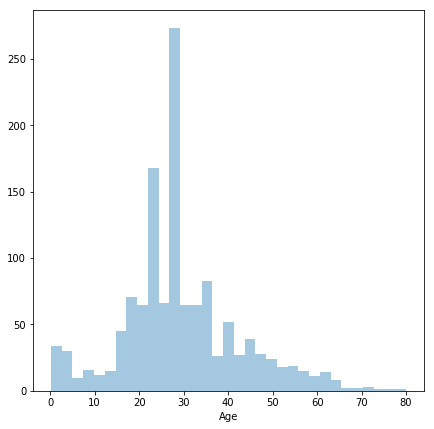

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(Data['Age'],kde=False)
plt.show()

In [18]:
Data['Catagorical_Age']=pd.cut(Data['Age'],9,labels=[1,2,3,4,5,6,7,8,9])
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Tit,Title,Catagorical_Age
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr,4


c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


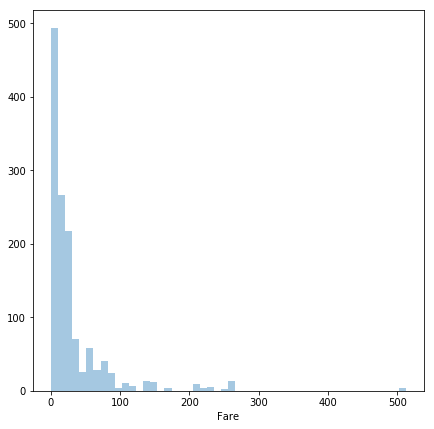

In [19]:
plt.figure(figsize=(7,7))
sns.distplot(Data['Fare'],kde=False)
plt.show()

In [20]:
Data['Fare_Category']=pd.cut(Data['Fare'],9,labels=[1,2,3,4,5,6,7,8,9])
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Tit,Title,Catagorical_Age,Fare_Category
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr,3,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs,5,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss,3,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs,4,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr,4,1


In [21]:
Data=Data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch','Tit'],axis=1)
Data.head()

,Survived,Pclass,Sex,Embarked,Has_Cabin,Title,Catagorical_Age,Fare_Category
0,0.0,3,male,S,0,Mr,3,1
1,1.0,1,female,C,1,Mrs,5,2
2,1.0,3,female,S,0,Miss,3,1
3,1.0,1,female,S,1,Mrs,4,1
4,0.0,3,male,S,0,Mr,4,1


In [22]:
Data=pd.get_dummies(Data)
Data.head()

,Survived,Pclass,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Catagorical_Age_9,Fare_Category_1,Fare_Category_2,Fare_Category_3,Fare_Category_4,Fare_Category_5,Fare_Category_6,Fare_Category_7,Fare_Category_8,Fare_Category_9
0,0.0,3,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,1,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,3,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.0,1,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,3,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
Label=Data['Survived']
Data=Data.drop('Survived',axis=1)
Data.head()
Label.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [27]:
X_Train,X_Test,Y_train,Y_Test=train_test_split(Data,Label,test_size=0.2,random_state=0)


In [31]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(X_Train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
Pred=Lr.predict(X_Test)

In [34]:
mis=(Pred!=Y_Test).sum()
ln=X_Test.shape[0]
acc=1-(mis/ln)
Acc=acc*100
print("{} points mislabeled out of {} \nAccuracy {:05.2f} %".format(mis,ln,Acc))

81 points mislabeled out of 262 
Accuracy 69.08 %
